# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results_data=pd.merge( study_results,mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_results_data.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
number_mice= len(mouse_study_results_data["Mouse ID"].unique())
number_mice

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_study_results_data[mouse_study_results_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

duplicated_mice_ids = duplicate_mouse["Mouse ID"].unique()
duplicated_mice_ids


array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_data =mouse_study_results_data [ mouse_study_results_data["Mouse ID"] == duplicated_mice_ids[0]]

duplicated_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_cleaned=mouse_study_results_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
mice=len(data_cleaned["Mouse ID"].unique())
mice

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

drug_data = data_cleaned.set_index(["Drug Regimen"])
grouped_drug_data = drug_data.groupby("Drug Regimen")
grouped_drug_data.head()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = grouped_drug_data["Tumor Volume (mm3)"].mean()
drug_median = grouped_drug_data["Tumor Volume (mm3)"].median()
drug_var = grouped_drug_data["Tumor Volume (mm3)"].var()
drug_SD = grouped_drug_data["Tumor Volume (mm3)"].std()
drug_SEM = grouped_drug_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_stat_data_df=pd.DataFrame({"Mean Tumor Volume":  drug_mean,
                                 "Median Tumor Volume":  drug_median,
                                 "Tumor Volume Variance":  drug_var,
                                 "Tumor Volume Std. Dev.":  drug_SD,
                                 "Tumor Volume Std. Err.":  drug_SEM})
drug_stat_data_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Assuming you have a DataFrame named drug_data
# Group the data by "Drug Regimen" and then calculate the desired summary statistics
aggre_stat_data = drug_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
aggre_stat_data

C:\Users\swapn\AppData\Local\Temp\ipykernel_2864\1255325581.py:7: FutureWarning: The provided callable <function mean at 0x00000170AB3E94E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggre_stat_data = drug_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
C:\Users\swapn\AppData\Local\Temp\ipykernel_2864\1255325581.py:7: FutureWarning: The provided callable <function median at 0x00000170AB521760> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  aggre_stat_data = drug_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
C:\Users\swapn\AppData\Local\Temp\ipykernel_2864\1255325581.py:7: FutureWarning: The provided callable <function var

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

     Drug Regimen  Timepoint
0       Capomulin          0
1        Ketapril          0
2        Ketapril          0
3        Ketapril          0
4        Ketapril          0
...           ...        ...
1888    Capomulin         45
1889    Capomulin         45
1890     Ceftamin         45
1891      Placebo         45
1892     Stelasyn         45

[1888 rows x 2 columns]
Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: count, dtype: int64


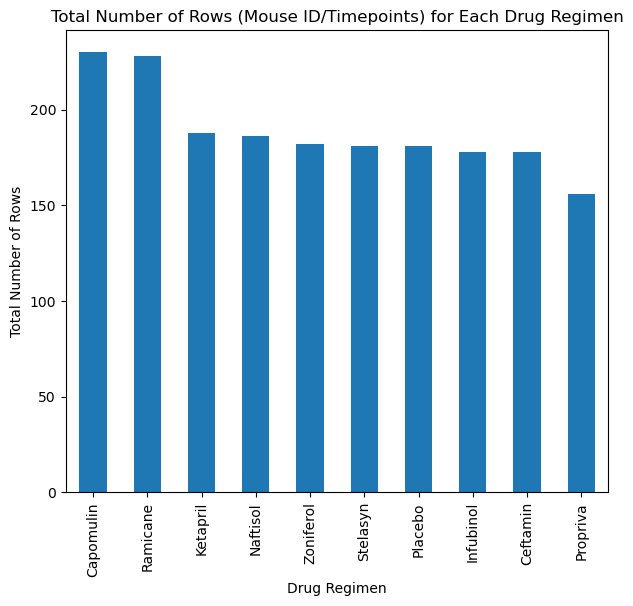

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drug = data_cleaned[["Drug Regimen","Timepoint"]]
print(mice_drug)

# Group the data by "Drug Regimen" and count the number of rows in each group
mice_per_drug = mice_drug["Drug Regimen"].value_counts()
print(mice_per_drug)

# Create a bar plot
mice_per_drug.plot(kind='bar',figsize=(7, 6) )
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.show()

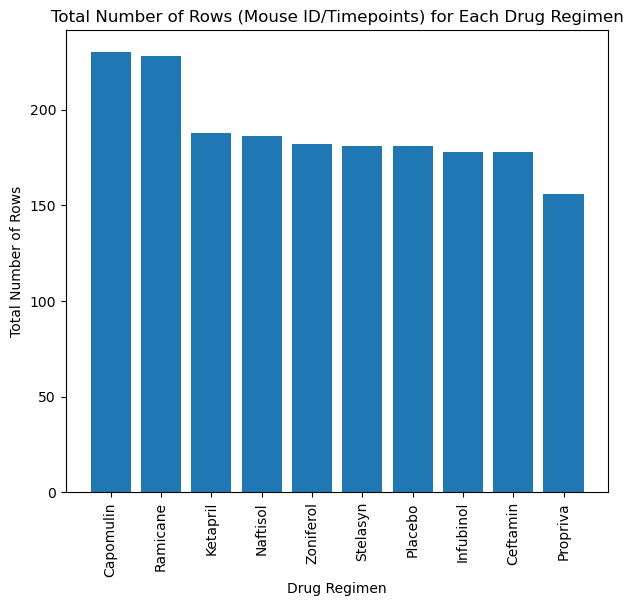

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create a bar plot using Matplotlib
plt.figure(figsize=(7, 6))
plt.bar(mice_per_drug.index, mice_per_drug.values)
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.xticks(rotation=90)
plt.show()



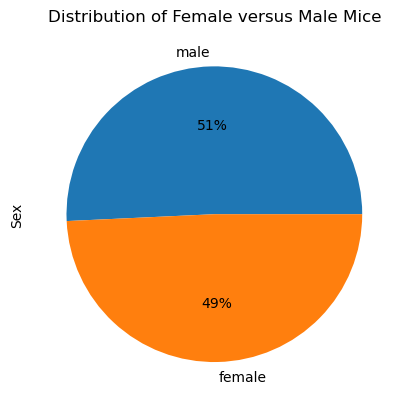

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data=data_cleaned["Sex"]
gender_data

# Count the number of male and female mice
gender_data_count = gender_data.value_counts()

# Create a pie plot using Pandas
gender_data_count.plot(kind="pie", autopct="%1.0f%%", labels=["male", "female"])
plt.ylabel('Sex') 
plt.title("Distribution of Female versus Male Mice")
plt.show()


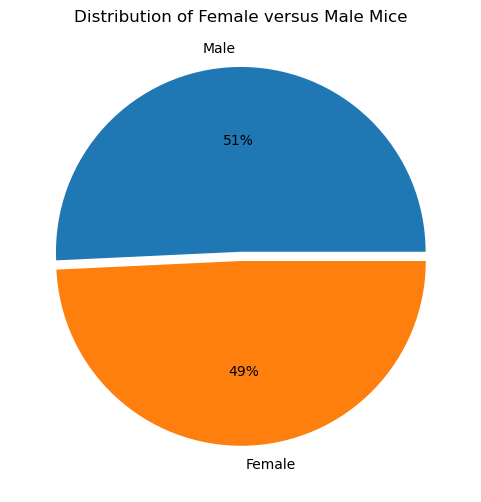

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Create a pie plot using Matplotlib (PyPlot)
plt.figure(figsize=(6, 6))
plt.pie(gender_data_count, labels=["Male", "Female"],explode = [0.05,0],autopct="%1.0f%%")
plt.title("Distribution of Female versus Male Mice")
plt.show()



## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_drugs= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_data = data_cleaned[data_cleaned["Drug Regimen"].isin(selected_drugs)]
final_tumor_data
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint=final_tumor_data.groupby("Mouse ID")["Timepoint"].max()
final_timepoint_df=pd.DataFrame(final_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume=pd.merge(final_timepoint_df,final_tumor_data,on=["Mouse ID","Timepoint"] ,how="left")
final_tumor_volume_df=pd.DataFrame(final_tumor_volume)
final_tumor_volume_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [54]:
   # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volume
    # add subset 
    # Determine outliers using upper and lower bounds
    # Put treatments into a list for a for loop (and later for plot labels)


# Put treatments into a list for a for loop (and later for plot labels)
treatment_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data (for plotting)
tumor_values = []

# Loop through each treatment label
for label in treatment_labels:
    # Filter data for the current treatment
    subset_data = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == label]
    
    # Get the tumor volumes for the current treatment
    volumes = subset_data["Tumor Volume (mm3)"]
    
    # Append tumor volumes to the list for plotting
    tumor_values.append(volumes)
    
    # Calculate the IQR for the current treatment
    quartiles = volumes.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr_value = upper_q - lower_q
    
    # Determine potential outliers for the current treatment
    lower_bound = lower_q - 1.5 * iqr_value
    upper_bound = upper_q + 1.5 * iqr_value
    outliers= volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    # Print the results for the current treatment
   # print(subset_data)
   # print(f"Treatment: {label}")
    #print(f"IQR: {iqr_value}")
   # print(f"Potential Outliers: {volumes[(volumes < lower_bound) | (volumes > upper_bound)].values}")
   # print("")
   #desired given out put 
    print(f"{label}'s potential outliers:{outliers}")
    print("-------------------------")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------
Infubinol's potential outliers:15    36.321346
Name: Tumor Volume (mm3), dtype: float64
-------------------------
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------


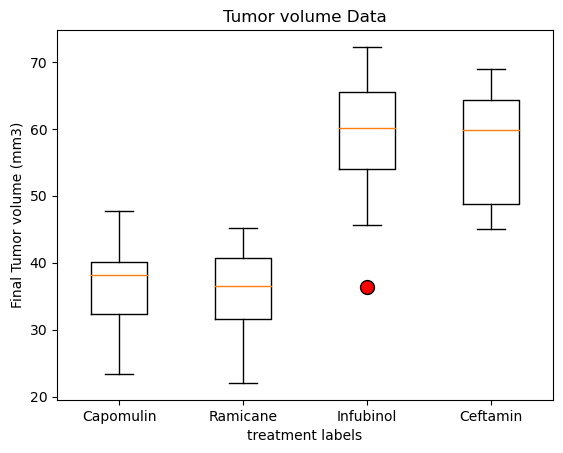

In [71]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_values, labels = treatment_labels, flierprops={"markerfacecolor": "red", "markeredgecolor":"black","markersize":"10"})
plt.title("Tumor volume Data")
plt.ylabel("Final Tumor volume (mm3)")
plt.xlabel("treatment labels")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'tumor volume')

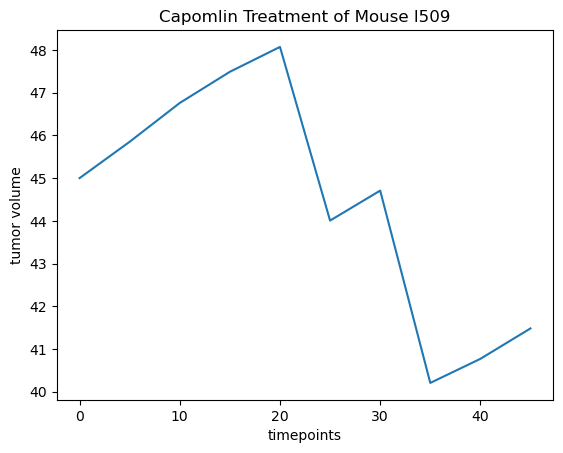

In [99]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#mouse_tumor_vol=mouse["Tumor Volume (mm3)"]
#mouse_timepoint=mouse["Timepoint"]
mouse=data_cleaned[data_cleaned["Mouse ID"]=="l509"]
#print(mouse)
plt.plot(mouse["Timepoint"],mouse["Tumor Volume (mm3)"])
plt.title("Capomlin Treatment of Mouse l509")
plt.xlabel("timepoints")
plt.ylabel("tumor volume")

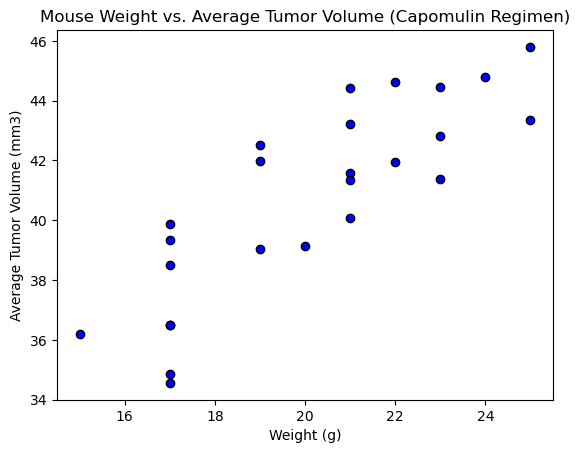

In [106]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for the "Capomulin" regimen
capomulin_data = data_cleaned[data_cleaned["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_vol_capomulin = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the mouse weight for each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate a scatter plot
plt.scatter(mouse_weight, avg_tumor_vol_capomulin, marker="o", facecolors="blue", edgecolors="black")

# Set the title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.
The r-squared is: 0.709


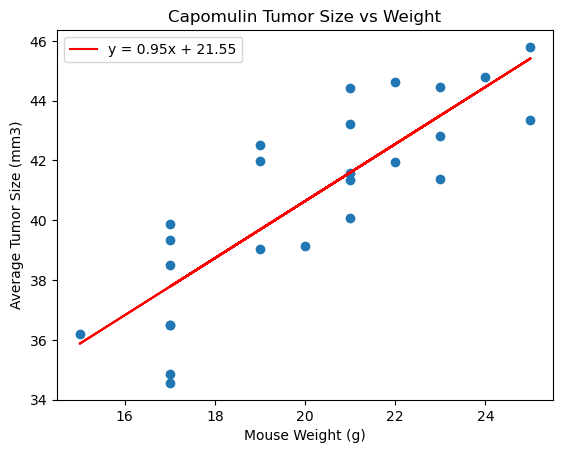

In [134]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(mouse_weight, avg_tumor_vol_capomulin)[0]

# Print statement
print(f"The correlation between weight and average tumor volume on the Capomulin regimen is {correlation:.2f}.")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_vol_capomulin)

# Calculate the regression values for each mouse weight
regress_values = slope * mouse_weight + intercept

# Display regression values with 2 decimal places
#regress_values = regress_values.map('{:.2f}'.format)

# Print the regression values
#print(f"Regression values are: {regress_values}")
print(f"The r-squared is: {round(rvalue**2,3)}")
# Create a scatter plot and plot the regression line
plt.scatter(mouse_weight, avg_tumor_vol_capomulin)
plt.plot(mouse_weight, regress_values, "r", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Capomulin Tumor Size vs Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.legend()
plt.show()
